# Обучение сети распознаванию рукописных цифр

In [2]:
!pip install tensorflow

In [3]:
# импорт библиотек
import numpy as np 
import matplotlib.pyplot as plt # визуалиация
from tensorflow.keras.datasets import mnist # библиотека с рукописными цифрами
from tensorflow import keras # библиотека для глубокого машинного обучения, взаимодействия с искусственными нейронными сетями
from tensorflow.keras.layers import Dense, Flatten # Dense - слой получает информацию со всех узлов предыдущего слоя 
                                                   # Flatten - для конвертации входящих данных в меньшую размерность.
%matplotlib inline # статичность графиков

In [6]:
# загружаем обучающую и тестовую выборку из библиотеки
(train_img, train_num), (test_img, test_num) = mnist.load_data()

In [7]:
print(train_img.shape)
print(train_num.shape)
print(test_img.shape)
print(test_num.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Имеем 60тыс. изображений - обучающая выборка, 10тыс. - тестовая выборка  
Каждое изображение имеет размер 28х28 пикселей. В градациях серого: 0 - черный цвет, 255 - белый. 1 канал(слой), так как это растровое изображение с градацией серого, 1 байт - 1 пиксель.  
1 канал, так 
train_img - изображение цифр от 0-9 (обучающая выборка)  
train_num - число, которое изображено на картинке (обучающая выборка)  

Рассмотрим изображения.

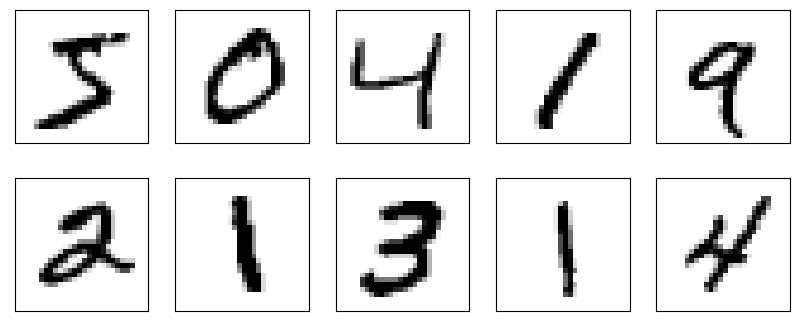

In [10]:
# отрисовка первых 10 изображений на обучающей выборке
plt.figure(figsize=(10,4)) # размер графика
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([]) # значения оси х 
    plt.yticks([]) # значения оси у
    plt.imshow(train_img[i], cmap=plt.cm.binary)
    
plt.show()

Вот как выглядят первые 10 изображений. Мы хотим, чтобы наша нейронная сеть правильно могла распознать цифру на изображении.
Каждая цифра имеет разное рукописное написание.  
Изображения являются растровыми, каждый пиксель хранит информацию о цвете точки, цвет с градациями серого

Будем использовать обычную полносвязную нейронную сеть. Полносвязная нейронная сеть прямого распространения - это сеть, в которой каждый нейрон связан со всеми остальными нейронами, находящимися в соседних слоях, и в которой все связи направлены строго от входных нейронов к выходным.  
Преимущества такого типа сети: простота и интуитивность, универсальность.  
  
Первый слой будет состоять из 28х28 = 784 нейронов. +bias(смещение) - значение, которое будет прибавляться к функции регрессии.  
Второй слой - 128 нейронов(скрытый слой).  
Выходной слой - 10 нейронов(так как десять цифр)  
  
ReLu - функция активации для скрытого слоя. Она преобразует входное значение в значение от 0 до положительной бесконечности. Если входное значение меньше или равно нулю, то ReLU выдает ноль, в противном случае - входное значение.
Зачем функция активации?
Нейрон будет принимать различные значения в зависимости от подобранных сетью весов. То есть значение Y может быть любым в диапазоне от -бесконечности до +бесконечности, нейрон не знает границу, после которой следует активация. Чтобы помочь модели понять, стоит ли активировать нейрон или его можно игнорировать, вводят функцию активации.  
  
Она проверяет произведенное нейроном значение Y на предмет того, стоит ли рассматривать этот нейрон как активированный, или его можно игнорировать. Конечно, можно столкнуться с проблемой умирающего ReLu, когда нейроны будут постепенно умирать, делая значительную часть нейросети пассивной. Для этого следует избегать 0.  
  
Для выходного слоя будем использовать - softmax. Функция принимает числа, а вернут распределение вероятностей. Это очень удобно, так как каждый выходной элемент будет неотрицательным, их сумма будет равна 1, это набор чисел, пригодный для распределения вероятностей.

На вход сети подается изображение. На первом слое изображение должно быть разбито на 784 нейрона. Для этого нужен слой Flatten, он разобьет изображение на 784 элемента.  
Flatten(input_shape=(28,28,1)) - изображение с размерностью 28*28*1.
Чтобы связать слои в сети, то есть каждый вход сети связать с нейроном следующего слоя используем класс Dense.  
Dense(128, activation='relu') - слой из 128 нейронов, активация с помощью relu.  
Dense(10, activation='softmax') - слой из 10 нейронов, активация с помощью softmax.

In [11]:
# формирование структуры модели
model = keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') 
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Param - веса, которые модель будет подбирать в процессе обучения. На первом(входном) слое их нет.  
  
На втором слое уже имеем 100 480 настраиваемых параметров. Это число получилось из 785х128.  
Подробнее: на первом слое мы имеем 784 нейрона+bias(константа, помогающая настроить модель, смещение). На втором слое - 128 нейронов. То есть каждый нейрон из первого слоя выстроит связь с каждым нейроном из второго слоя, а связь описывается весами(параметрами). Значит, мы будем иметь 100 480 весовых коэффициентов на втором слое(связей, параметров).  
  
Аналогично третий слой: (128 нейронов + 1bias)х 10 нейронов на последнем слое = 1 290

Займемся нормализацией входных данных (или Масштабирование характеристик - Feature scaling), разделим их на 255(количество пикселей), чтобы получить диапазон [0-1]. Это помогает оптимизатору быстрее добиться минимизации, градиентный спуск сходится намного быстрее с масштабированием объектов.

In [12]:
# нормализация входных данных
train_img = train_img / 255
test_img = test_img / 255

Так как на выходе мы получаем не просто цифру, а вектор, то наши данные в выборках надо преобразовать из массива в вектор. Длина будет - 10, так как 10 элементов. 1 будет стоять на месте верного значения.

In [16]:
# преобразование входных значений в векторы
train_num_cat = keras.utils.to_categorical(train_num, 10)
test_num_cat = keras.utils.to_categorical(test_num, 10)
